In [1]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Import Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from sklearn.cluster import KMeans 
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.metrics import silhouette_score

# Read data from file

In [4]:
path = r"C:\Users\Admins\Foundation of Data Science Projects\SCMission-2023_Round-3-Data-Đã clean.xlsm"

In [5]:
df = pd.read_excel(path, sheet_name = 'Customer_Master')
df.head()

,STT,CustomerRef,CustomerName,SoldToCode,SoldToName,MajorAccount,MajorAccountCode,MajorAccountCode.1,Channel,SubChannel,Longitude,Latitude,City,State,Country,SalesOrganization,Region
0,1,11000128,Customer 48,11000128,Company 4,Account 3,91363,91240,Foodservice,National Distributor,145.206237,-38.025962,Greater Dandenong,Victoria,Australia,Organization 1,Greater Melbourne
1,2,11000144,Customer 50,11000144,Company 6,Account 4,91418,91295,Foodservice,National Distributor,144.947676,-37.728991,Moreland,Victoria,Australia,Organization 1,Greater Melbourne
2,3,11000149,Customer 51,11000149,Company 7,Account 3,91363,91240,Foodservice,National Distributor,152.519049,-32.197687,Great Lakes,New South Wales,Australia,Organization 1,Mid North Coast
3,4,11000159,Customer 52,11000159,Company 8,Account 3,91363,91240,Foodservice,National Distributor,153.122555,-27.617230,Logan,Queensland,Australia,Organization 1,Greater Brisbane
4,5,11000176,Customer 53,11000176,Company 9,Account 4,91418,91295,Foodservice,National Distributor,145.197119,-37.990926,Greater Dandenong,Victoria,Australia,Organization 1,Greater Melbourne


# Turn Longtitude and Latitude into one 2D array

In [6]:
longitude = df['Longitude'].to_list()
latitude = df['Latitude'].to_list()

In [7]:
X = np.array(list(zip(longitude, latitude)))

# Print out 5 first cordinates
print(X[0:5, :])

[[145.206237  -38.025962 ]
 [144.9476759 -37.7289906]
 [152.5190493 -32.1976865]
 [153.1225552 -27.6172304]
 [145.1971191 -37.9909257]]


# Visualize the Longtitude and Latitude

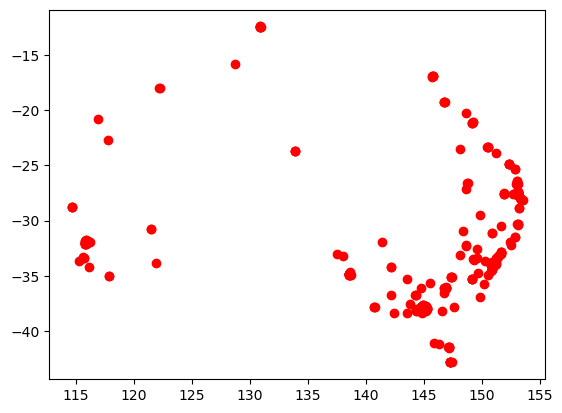

In [8]:
plt.scatter(X[:, 0], X[:, 1], marker='o', color = 'r')

# Attempt to identify a right value for k

### Elbow Method
* Iterate over a range of k values and run k-means clustering for each k.
* For each k, calculate the sum of squared distances (SSE) between data points and their cluster centroids.
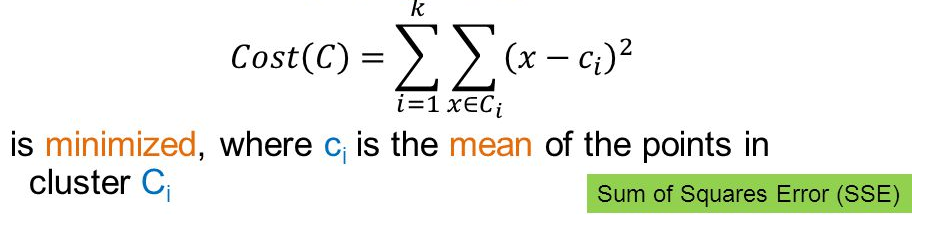
* Plot the SSE values against the corresponding k values.
* Look for the "elbow" point in the plot, where the SSE starts to level off.
* The k value at the elbow point can be a good choice for the number of clusters.

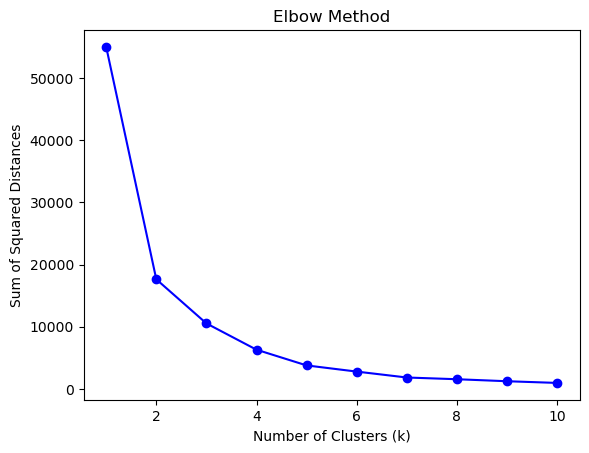

In [9]:
# Define the range of k values to test
k_values = range(1, 11)

# Calculate sum of squared distances for each k value
sse = []

for k in k_values:
    k_means = KMeans(init = "k-means++", n_clusters = k, n_init = 12)
    k_means.fit(X)
    sse.append(k_means.inertia_)

# Plot the SSE values against k
plt.plot(k_values, sse, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method')
plt.show()

### Silhouette Coefficient Method
* Iterate over a range of k values and run k-means clustering for each k.
* For each k, calculate the silhouette coefficient for each data point.
* Compute the average silhouette coefficient for all data points.
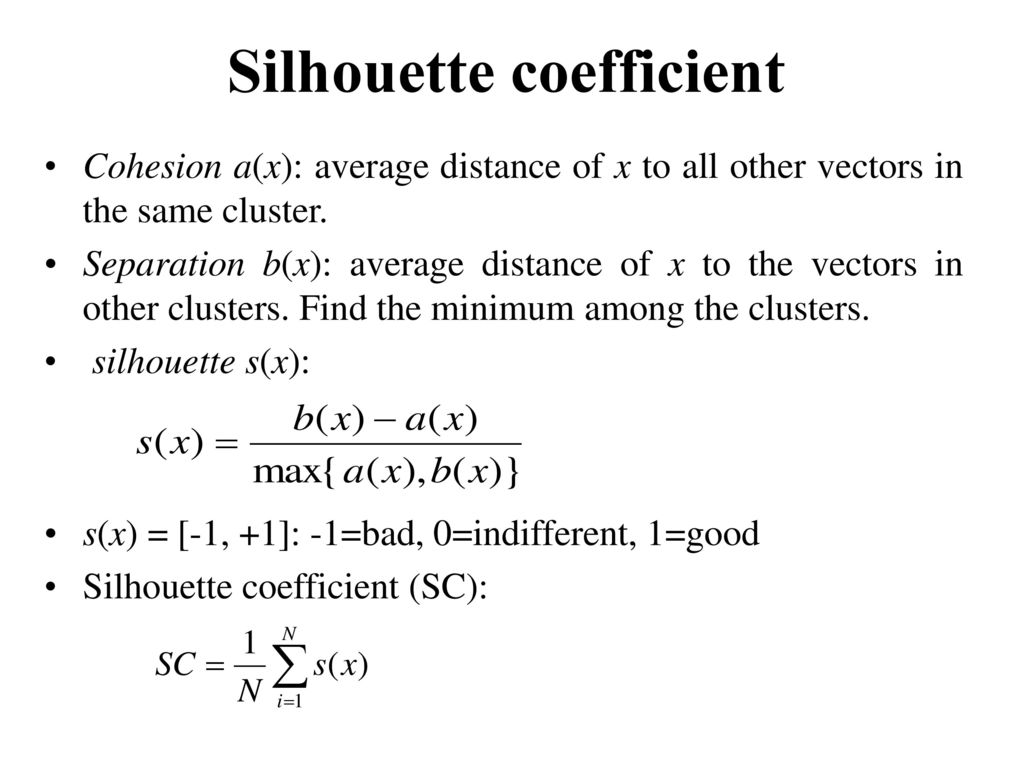
* Plot the average silhouette coefficients against the corresponding k values.
* Look for the highest average silhouette coefficient, indicating well-separated clusters.
* The k value corresponding to the highest coefficient can be a suitable choice.

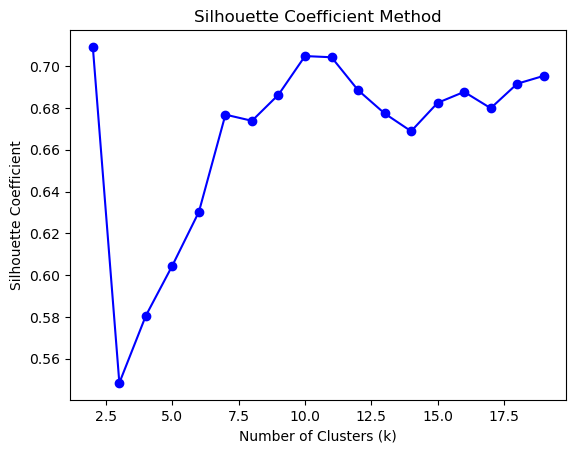

In [10]:
# Define the range of k values to test
k_values = range(2, 20)

# Calculate the average silhouette coefficient for each k value
silhouette_scores = []
for k in k_values:
    k_means = KMeans(init = "k-means++", n_clusters = k, n_init = 12)

    k_means.fit(X)
    score = silhouette_score(X, k_means.labels_)
    silhouette_scores.append(score)

# Plot the average silhouette coefficients against k

plt.plot(k_values, silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Coefficient')
plt.title('Silhouette Coefficient Method')
plt.show()

# Deciding the final value for k
## From using Silhouette Coefficient Method
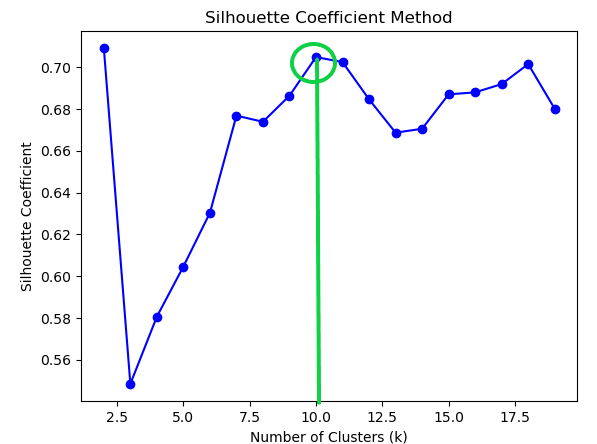
## From using Elbow Method
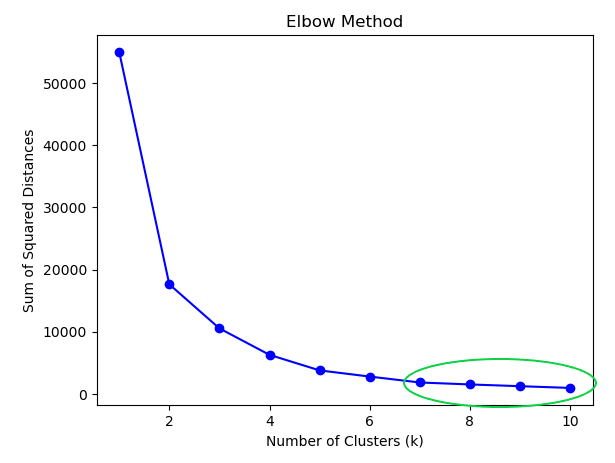

# Conclusion: 10 is the most appropriate value 

In [11]:
# Final k value, final number of clusters
k_zones = 10

In [12]:
# Define the model
k_means = KMeans(
    init = "k-means++", 
    n_clusters = k_zones, 
    n_init = 12
    )

# Train model
k_means.fit(X)

KMeans(n_clusters=10, n_init=12)

In [13]:
pred = k_means.predict(X)

## Clusters

In [14]:
k_means_labels = k_means.labels_
k_means_labels[0:10]

array([4, 4, 0, 3, 4, 2, 1, 4, 4, 4])

## Centroids' Cordinates

In [15]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[150.79401491, -33.61984754],
       [116.29999564, -32.07056891],
       [130.61707883, -12.85788494],
       [152.62716452, -27.29841437],
       [145.21003449, -37.38839261],
       [148.03490911, -20.23281593],
       [133.86762134, -23.6879795 ],
       [139.18654066, -34.90650693],
       [147.06933031, -42.04900078],
       [119.77497193, -19.85422242]])

# Plot the Clustered Data

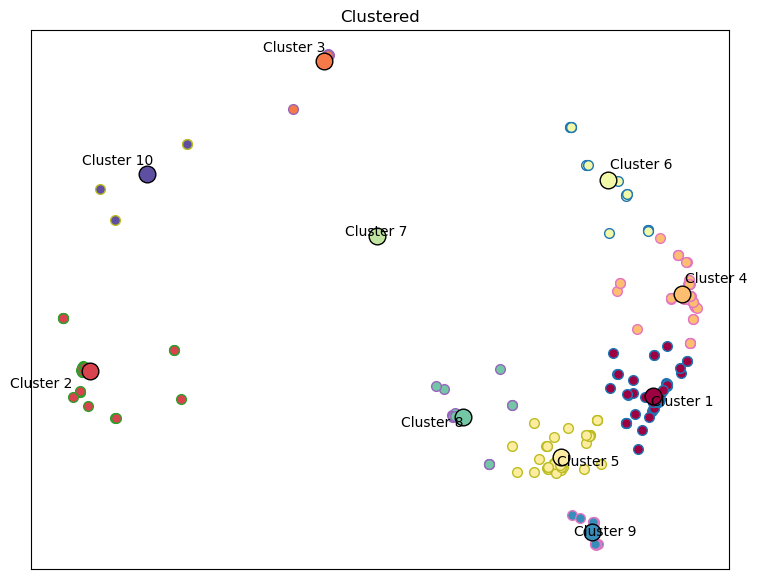

In [22]:
# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(9, 7))

# Colors uses a color map, which will produce an array of colors based on the number of labels there are. 
# We use set(k_means_labels) to get the unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-10, which will match the possible clusters that each data point is in.
for k, col in zip(range(k_zones), colors):
    
    # Create a list of all data points, where the data points that are 
    # in the cluster (ex. cluster 0) are labeled as true, 
    # else they are labeled as false.
    my_members = (k_means_labels == k)
    
    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]
    
    ax.plot(X[my_members, 0], X[my_members, 1], '.', markerfacecolor=col, marker='o', markersize = 7)
    
    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', 
            markersize=12)
    # Draw circle around the clusters
    radius = np.max(np.linalg.norm(X[my_members] - cluster_center, axis=1))
#     circle = plt.Circle(cluster_center, radius, color=col, fill=False)
#     ax.add_patch(circle)

    
    # Calculate the displacement for the centroid labels
    dx = np.sign(cluster_center[0] - np.mean(X[:, 0])) * radius * 6
    dy = np.sign(cluster_center[1] - np.mean(X[:, 1])) * radius * 2

    # Add centroid labels outside the circle
    ax.annotate(f'Cluster {k+1}', (cluster_center[0], cluster_center[1]), xytext=(dx, dy),
                textcoords='offset points', ha='center', fontsize=10)
    

# Title of the plot
ax.set_title('Clustered')

# Remove x-axis ticks
ax.set_xticks(())
# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()


### Create the answer sheet dataframe

In [17]:
task1_answer = pd.DataFrame(columns = ['CustomerName', "Cluster"])
task1_answer

,CustomerName,Cluster


# Add in the result

In [18]:
task1_answer['CustomerName'] = df['CustomerName']
task1_answer['Cluster'] = k_means_labels + 1

task1_answer.head()

,CustomerName,Cluster
0,Customer 48,5
1,Customer 50,5
2,Customer 51,1
3,Customer 52,4
4,Customer 53,5


In [19]:
task1_answer

,CustomerName,Cluster
0,Customer 48,5
1,Customer 50,5
2,Customer 51,1
3,Customer 52,4
4,Customer 53,5
...,...,...
309,Customer 639,4
310,Customer 640,4
311,Customer 650,5
312,Customer 855,5


# Save the result dataframe to csv file

In [20]:
task1_answer.to_csv('D:\Task1.csv', index = False)